<a href="https://colab.research.google.com/github/suajeong52/collapsible_tube/blob/main/sua_collapsibletube_try(tanh).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install sciann

     |████████████████████████████████| 174 kB 8.5 MB/s 
     |████████████████████████████████| 460.3 MB 7.9 kB/s 
     |████████████████████████████████| 561 kB 57.7 MB/s 
     |████████████████████████████████| 4.0 MB 42.9 MB/s 
     |████████████████████████████████| 462 kB 63.6 MB/s 
     |████████████████████████████████| 1.2 MB 44.3 MB/s 
     |████████████████████████████████| 14.8 MB 35.5 MB/s 
     |████████████████████████████████| 132 kB 74.7 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68722 sha256=d9d03ba1a4f2d08827b9b655961767a6d06f349e66b20cb575a21128f5c1dc64
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: numpy
    Found existin

In [2]:
import numpy as np 
import sciann as sn 
import matplotlib.pyplot as plt  
from numpy import pi
from sciann.utils.math import diff, sign, sin, sqrt, pow

---------------------- SCIANN 0.6.6.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.5.3 
Python Version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0] 



In [3]:
x = sn.Variable('x')
t = sn.Variable('t')
u = sn.Functional('u', [x,t], 8*[20], 'tanh')
#A = sn.Functional('A', [x,t],  8*[20], 'relu')

In [4]:
#L1 = diff(A, t) + u * diff(A, x) + A * diff(u, x)

In [5]:
rho = 1
#beta = 200
beta = 1
#L2 = diff(u, t) + u * diff(u, x) + beta / (2 * rho * sn.pow(A * A + 0.01, 0.25)) * diff(A, x, order=1)
L2 = diff(u, t) + u * diff(u, x)  

In [6]:
TOL = 0.001
T = 10
omega = 2 * np.pi / T
C1 = (1 - sign(t - TOL)) * (u - 0)
#C2 = (1 - sign(t - TOL)) * (A - 1)
#C3 = (1 - sign(x - TOL)) * (u - sin(omega * t))
C3 = (1 - sign(x - TOL)) * (u - sin(2*np.pi * t))
#C4 = (1 - sign(x - TOL)) * (A - 1)


In [7]:
#m = sn.SciModel([x,t], [L1,L2, C1, C3, C4], loss_func="mse", optimizer="Adam")
m = sn.SciModel([x,t], [L2, C1, C3], loss_func="mse", optimizer="Adam")

In [8]:
x_data, t_data = np.meshgrid(
    np.linspace(0, 1, 100), 
    np.linspace(0, 1, 100)
)

In [9]:
#h = m.train([x_data, t_data], 6*['zero'], learning_rate=0.001, epochs=1000, batch_size =120,  verbose=1, shuffle=True)
h = m.train([x_data, t_data], 3*['zero'], learning_rate=0.007, epochs=3000, batch_size =158, verbose=1, shuffle=True)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
64/64 [==============================] - 0s 6ms/step - batch: 31.5000 - size: 156.2500 - loss: 0.0204 - add_loss: 1.8668e-20 - mul_2_loss: 9.3807e-06 - mul_4_loss: 0.0204 - lr: 0.0035 - time: 0.3944
Epoch 510/3000
64/64 [==============================] - 0s 6ms/step - batch: 31.5000 - size: 156.2500 - loss: 0.0197 - add_loss: 8.2496e-21 - mul_2_loss: 2.3284e-05 - mul_4_loss: 0.0197 - lr: 0.0035 - time: 0.3887
Epoch 511/3000
64/64 [==============================] - 0s 6ms/step - batch: 31.5000 - size: 156.2500 - loss: 0.0196 - add_loss: 1.1399e-20 - mul_2_loss: 1.3144e-05 - mul_4_loss: 0.0196 - lr: 0.0035 - time: 0.4045
Epoch 512/3000
64/64 [==============================] - 0s 5ms/step - batch: 31.5000 - size: 156.2500 - loss: 0.0198 - add_loss: 8.0469e-21 - mul_2_loss: 1.4040e-05 - mul_4_loss: 0.0198 - lr: 0.0035 - time: 0.3787
Epoch 513/3000
64/64 [==============================] - 0s 6ms/step - batch: 31.5000 - size: 156.2500 - loss: 0.0197 - add_

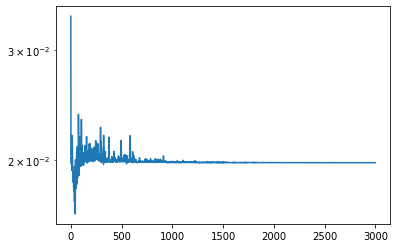

In [10]:
plt.semilogy(h.history['loss'])

In [11]:
h.history.keys()

dict_keys(['loss', 'add_loss', 'mul_2_loss', 'mul_4_loss', 'lr', 'time'])

<function matplotlib.pyplot.show>

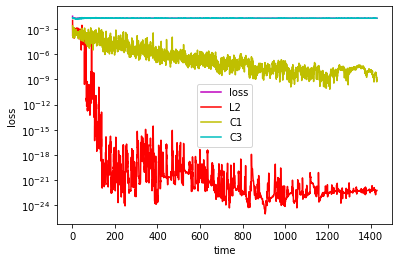

In [12]:
time = np.cumsum(h.history['time'])
plt.semilogy(time, h.history['loss'],'m')
plt.semilogy(time, h.history['add_loss'],'r')
#plt.semilogy(time, h.history['add_5_loss'],'b')
plt.semilogy(time, h.history['mul_2_loss'],'y')
plt.semilogy(time, h.history['mul_4_loss'],'c')
#plt.semilogy(time, h.history['mul_10_loss'],'k')
#plt.semilogy(time, h.history['mul_11_loss'],'g')
plt.legend(['loss','L2','C1', 'C3'])
plt.xlabel('time')
plt.ylabel('loss')
plt.show

In [13]:
x_test, t_test = np.meshgrid(
    np.linspace(0, 1, 100), 
    np.linspace(0, 0, 1)
)
u_pred = u.eval(m, [x_test, t_test])
#A_pred = A.eval(m, [x_test, t_test])




In [14]:
u_pred

array([[-0.00017619, -0.00017619, -0.00017619, -0.00017619, -0.00017619,
        -0.00017619, -0.00017619, -0.00017619, -0.00017619, -0.00017619,
        -0.00017619, -0.00017619, -0.00017619, -0.00017619, -0.00017619,
        -0.00017619, -0.00017619, -0.00017619, -0.00017619, -0.00017619,
        -0.00017619, -0.00017619, -0.00017618, -0.00017619, -0.00017619,
        -0.00017619, -0.00017619, -0.00017619, -0.0001762 , -0.00017619,
        -0.0001762 , -0.00017619, -0.00017619, -0.0001762 , -0.00017619,
        -0.00017619, -0.0001762 , -0.00017619, -0.0001762 , -0.0001762 ,
        -0.00017619, -0.0001762 , -0.0001762 , -0.0001762 , -0.0001762 ,
        -0.00017619, -0.0001762 , -0.0001762 , -0.0001762 , -0.0001762 ,
        -0.0001762 , -0.0001762 , -0.0001762 , -0.00017619, -0.00017619,
        -0.0001762 , -0.0001762 , -0.0001762 , -0.00017619, -0.0001762 ,
        -0.0001762 , -0.00017619, -0.0001762 , -0.0001762 , -0.0001762 ,
        -0.0001762 , -0.0001762 , -0.0001762 , -0.0

In [15]:
u_pred = np.reshape(u_pred,100)
#A_pred = np.reshape(A_pred,30)

In [16]:
u_pred

array([-0.00017619, -0.00017619, -0.00017619, -0.00017619, -0.00017619,
       -0.00017619, -0.00017619, -0.00017619, -0.00017619, -0.00017619,
       -0.00017619, -0.00017619, -0.00017619, -0.00017619, -0.00017619,
       -0.00017619, -0.00017619, -0.00017619, -0.00017619, -0.00017619,
       -0.00017619, -0.00017619, -0.00017618, -0.00017619, -0.00017619,
       -0.00017619, -0.00017619, -0.00017619, -0.0001762 , -0.00017619,
       -0.0001762 , -0.00017619, -0.00017619, -0.0001762 , -0.00017619,
       -0.00017619, -0.0001762 , -0.00017619, -0.0001762 , -0.0001762 ,
       -0.00017619, -0.0001762 , -0.0001762 , -0.0001762 , -0.0001762 ,
       -0.00017619, -0.0001762 , -0.0001762 , -0.0001762 , -0.0001762 ,
       -0.0001762 , -0.0001762 , -0.0001762 , -0.00017619, -0.00017619,
       -0.0001762 , -0.0001762 , -0.0001762 , -0.00017619, -0.0001762 ,
       -0.0001762 , -0.00017619, -0.0001762 , -0.0001762 , -0.0001762 ,
       -0.0001762 , -0.0001762 , -0.0001762 , -0.0001762 , -0.00

In [17]:
x_test

array([[0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
        0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
        0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
        0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
        0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
        0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
        0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
        0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
        0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
        0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
        0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
        0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
        0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
        0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
        0.70707071, 0.71717172, 0.72727273, 0.73

In [18]:
x_test = np.reshape(x_test, 100)
x_test

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

Text(0, 0.5, 'u')

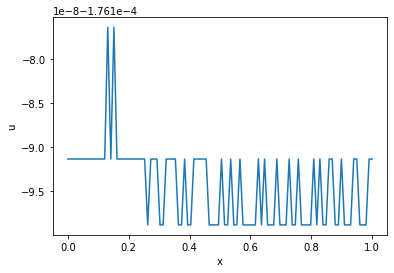

In [22]:
#fig = plt.figure(figsize=(3, 4))
plt.plot(x_test, u_pred)
plt.xlabel('x')
plt.ylabel('u')

Text(0, 0.5, 'u')

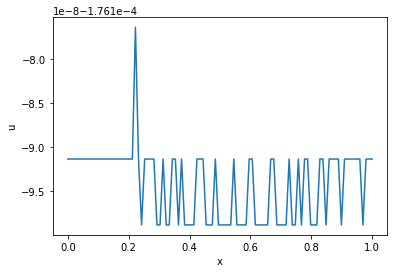

In [23]:
x_test, t_test = np.meshgrid(
    np.linspace(0, 1, 100), 
    np.linspace(0.5, 0.5, 1)
)
u_pred = u.eval(m, [x_test, t_test])
#A_pred = A.eval(m, [x_test, t_test])


u_pred = np.reshape(u_pred,100)
#A_pred = np.reshape(A_pred,30)
x_test = np.reshape(x_test, 100)


#fig = plt.figure(figsize=(3, 4))
plt.plot(x_test, u_pred)
plt.xlabel('x')
plt.ylabel('u')

Text(0, 0.5, 'u')

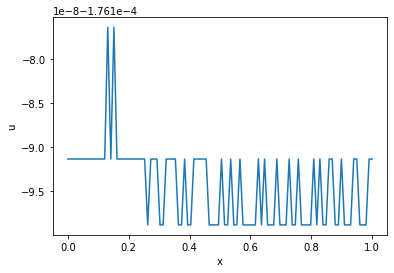

In [24]:
x_test, t_test = np.meshgrid(
    np.linspace(0, 1, 100), 
    np.linspace(1, 1, 1)
)
u_pred = u.eval(m, [x_test, t_test])
#A_pred = A.eval(m, [x_test, t_test])


u_pred = np.reshape(u_pred,100)
#A_pred = np.reshape(A_pred,30)
x_test = np.reshape(x_test, 100)


#fig = plt.figure(figsize=(3, 4))
plt.plot(x_test, u_pred)
plt.xlabel('x')
plt.ylabel('u')